# Script that demonstrates RML

In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definng variables
D = np.array(
    [[1, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0,  1, -1, 0, 0, 0, 0, 0, 0],
    [0, 0,  0, 1, -1, 0, 0, 0, 0, 0],
    [0, 0,  0, 0, 1, -1, 0, 0, 0, 0],
    [0, 0,  0, 0, 0, 1, -1, 0, 0, 0],
    [0, 0,  0, 0, 0, 0, 1, -1, 0, 0],
    [0, 0,  0, 0, 0, 0, 0, 1, -1, 0],
    [0, 0,  0, 0, 0, 0, 0, 0, 1, -1],
    [-1, 0, 0, 0, 0, 0, 0, 0, 0, 1],]
)
Q_m = D.T@D
mu_m = np.zeros(10)
Sigma_eps = np.identity(3)*0.001
G = np.zeros((3,10))
G[0][2] = 1
G[1][5] = 1
G[2][8] = 1
mu_eps = G@mu_m
d = np.array([5, 2, -10])
Q_m_modified = Q_m + np.identity(10)*0.0001
Sigma_m = np.linalg.inv(Q_m_modified)

In [3]:
# Matrix calculations
Sigma_mm = Sigma_m
Sigma_dm = G@Sigma_mm
Sigma_md = Sigma_mm@(G.T)
Sigma_dd = G@Sigma_mm@(G.T) + Sigma_eps
Sigma_dd_inv = np.linalg.inv(Sigma_dd)
mu_m_d = mu_m + Sigma_md@Sigma_dd_inv@(d-mu_eps)
Sigma_m_d = Sigma_mm - Sigma_md@Sigma_dd_inv@Sigma_dm 
sigma_m_d_ii = np.diagonal(Sigma_m_d)

Text(0.5, 1.0, 'Posterior mean with posterior standard deviation')

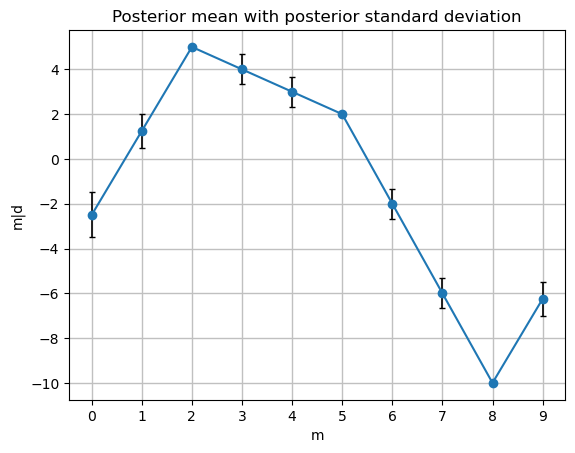

In [4]:
# Plotting the posterior of m given d
m = range(0, 10)
plt.errorbar(
    x = m,
    y = mu_m_d, 
    yerr=sigma_m_d_ii,
    xerr=None,
    fmt='o',
    ecolor='k',
    elinewidth=1.2, 
    capsize=2,
    linestyle='-',
)
plt.xlabel('m')
plt.ylabel('m|d')
plt.grid(color='silver', linestyle='-', linewidth=1)
plt.xticks(np.arange(len(m)))
plt.title('Posterior mean with posterior standard deviation')

Text(0, 0.5, 'm')

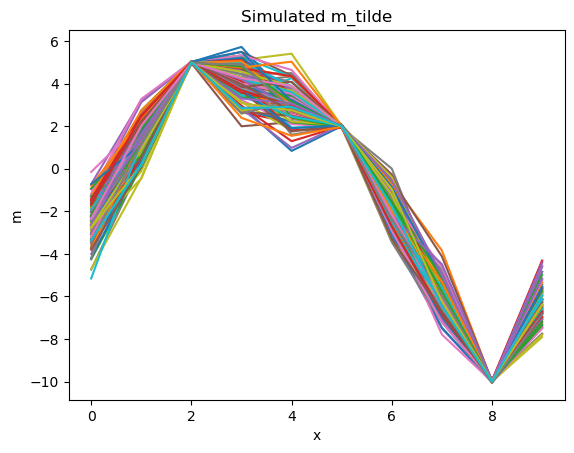

In [5]:
# Drawing samples from posterior to plot
N = 1000
m_sample = np.random.multivariate_normal(mu_m, Sigma_m, size=N)
epsilon_sample = np.random.multivariate_normal(np.zeros(3), Sigma_eps, size=N)
m_tilde = np.zeros((N, 10))
for i in range(N):
    m_tilde[i,] = m_sample[i] + Sigma_md@Sigma_dd_inv@(d - G@m_sample[i] - epsilon_sample[i])
plt.plot(range(10), m_tilde[:100,].T)
plt.title("Simulated m_tilde")
plt.xlabel("x")
plt.ylabel("m")

Text(0.5, 1.0, 'Mean and std of simulation')

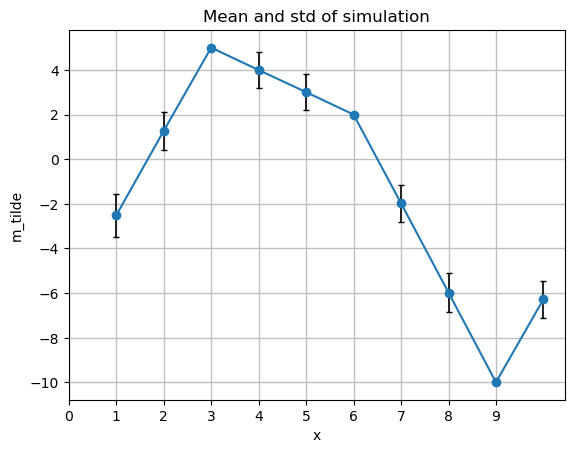

In [6]:
# Plotting the mean and std of the simulation
m_sample_mean = np.mean(m_tilde, axis=0)
m_sample_sd = np.std(m_tilde, axis=0)
m = range(1, 11)
plt.errorbar(
    x = m,
    y = m_sample_mean, 
    yerr=m_sample_sd,
    xerr=None,
    fmt='o',
    ecolor='k',
    elinewidth=1.2, 
    capsize=2,
    linestyle='-',
)
plt.xlabel('x')
plt.ylabel('m_tilde')
plt.grid(color='silver', linestyle='-', linewidth=1)
plt.xticks(np.arange(len(m)))
plt.title('Mean and std of simulation')